In [1]:
# Necessary Imports
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels (0 = Benign, 1 = Malignant)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (important for many algorithms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
# Implement AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize a base decision tree classifier
base_model = DecisionTreeClassifier(max_depth=1)  # Stump (shallow tree)

# Initialize the AdaBoostClassifier
adaboost = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)

# Train the AdaBoost model
adaboost.fit(X_train, y_train)

# Predict on the test set
y_pred_adaboost = adaboost.predict(X_test)

# Evaluate the model
adaboost_accuracy = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Model Accuracy: {adaboost_accuracy:.4f}")


AdaBoost Model Accuracy: 0.9649


In [5]:
# Implement Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=50, random_state=42)

# Train the Gradient Boosting model
gb.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb.predict(X_test)

# Evaluate the model
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Model Accuracy: {gb_accuracy:.4f}")


Gradient Boosting Model Accuracy: 0.9561


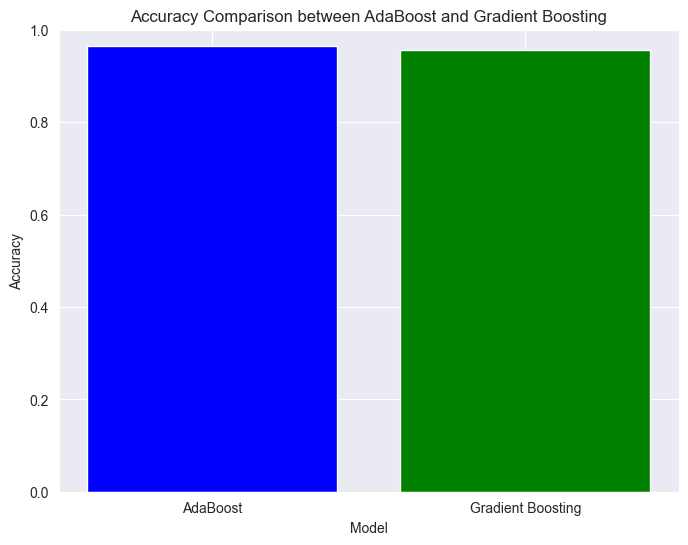

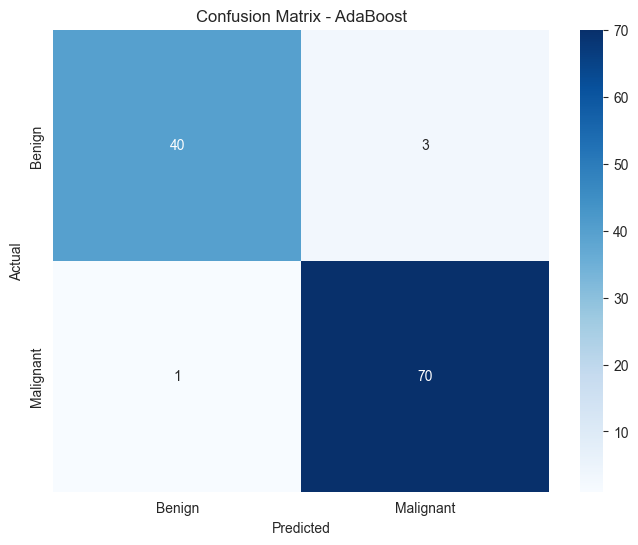

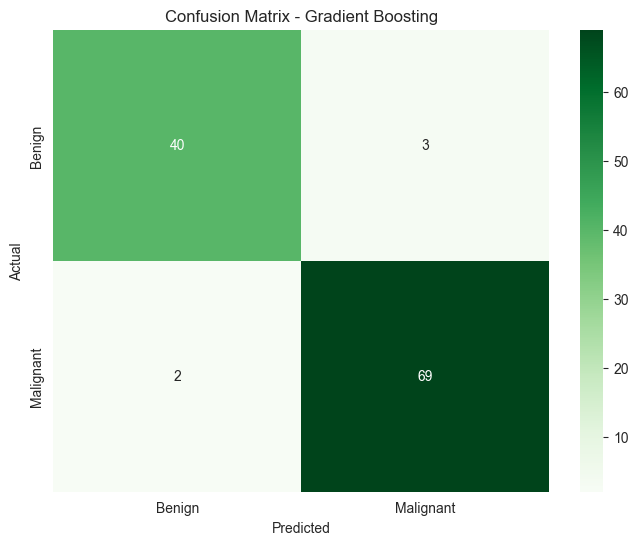

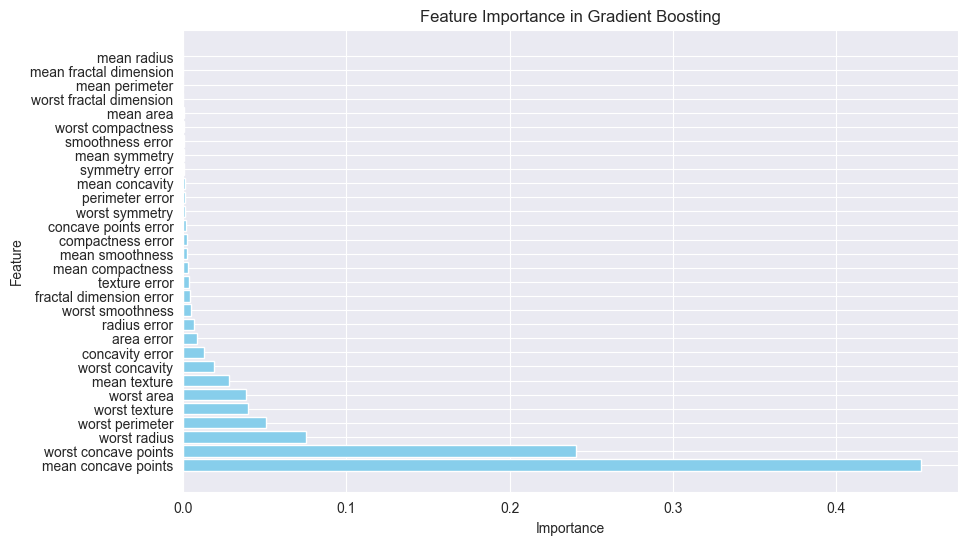

In [6]:
# Imports for Comparison
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Accuracy Comparison Bar Chart
models = ['AdaBoost', 'Gradient Boosting']
accuracies = [adaboost_accuracy, gb_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Accuracy Comparison between AdaBoost and Gradient Boosting')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Confusion Matrices

# AdaBoost Confusion Matrix
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)
# Gradient Boosting Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix for AdaBoost
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adaboost, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for Gradient Boosting
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Greens', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. Feature Importance Visualization (Gradient Boosting only)
# Extracting feature importances for Gradient Boosting
importances_gb = gb.feature_importances_
features = data.feature_names

# Create a bar plot of the feature importances
indices = np.argsort(importances_gb)[::-1]  # Sort features by importance
plt.figure(figsize=(10, 6))
plt.barh(features[indices], importances_gb[indices], color='skyblue')
plt.title('Feature Importance in Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
